In [174]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

В файле `data/weather.csv` находит архив погоды в г. Санкт-Петербург с 1 января 2008 года по 31 декабря 2016 года. Файл состоит из двух столбцов - дата (**Day**) и средняя дневная температура в этот день (**t**). Прочитать данные в `pandas` можно с помощью кода:

In [202]:
df = pd.read_csv('../data/weather.csv', encoding='utf-8', index_col=False, parse_dates=[0])

In [203]:
df.tail()


,Day,t
3280,2016-12-27,1
3281,2016-12-28,-3
3282,2016-12-29,0
3283,2016-12-30,3
3284,2016-12-31,4


С помощью `Pandas` решите следующие задачи

**1.** Определите самый холодный год, в котором средняя температура была минимальная и самый теплый год. 

In [99]:
# ваш код
max_t = -999999
min_t = 999999
for i in range(2008, 2017):
    s = df[df['Day'].dt.year == i]['t'].sum()
    if int(s) <= min_t:
        cold_year = i
        min_t = int(s)
    if int(s) >= max_t:
        warm_year = i
        max_t = int(s)
    


print(cold_year,' - ',  warm_year)

2012  -  2015


In [153]:
#2 вариант без цикла
s = df.groupby(df['Day'].dt.year).sum().sort_values(by='t', ascending=False)
cold_year = s[-1:]
warm_year = s[0:1]
print(cold_year)
print(warm_year)

         t
Day       
2012  2548
         t
Day       
2015  3314


**2.** Определите год, где в январе было наибольшее число дней с положительной температурой ($\text{t} \ge 0$).

In [109]:
# ваш код
max_days = 0
for i in range(2008, 2017):
    s = df[(df['Day'].dt.year == i)&(df['Day'].dt.month == 1)&(df['t']>=0)]['t'].count()
    if int(s) >= max_days:
        max_days = s
        max_year = i
print(max_year)



2008


In [254]:
#2 вариант без цикла
s = df.groupby(df[(df['Day'].dt.month == 1)&(df['t']>=0)]['Day'].dt.year)['Day'].count().sort_values(ascending=False)
max_year = s.iloc[0:1]
print(max_year)

Day
2008.0    19
Name: Day, dtype: int64


**3.** В каком году было самое холодное лето (по средней температуре)

In [110]:
# ваш код
min_t = 999999
for i in range(2008, 2017):
    s = df[(df['Day'].dt.year == i) & (df['Day'].dt.month <= 8) & (df['Day'].dt.month >= 6)]['t'].sum()
    if int(s) <= min_t:
        cold_summer = i
        min_t = int(s)
        
print(cold_summer)

2008


In [246]:
#2 вариант без цикла
s = df.groupby(df[(df['Day'].dt.month <= 8)&(df['Day'].dt.month >= 6)]['Day'].dt.year).sum().sort_values(by='t', ascending=True)
cold_summer = s.iloc[0:1]
print(cold_summer)


           t
Day         
2008.0  1667


**4.** Найдите день с самой большим перепадом температуры, если сравнивать со следующим днем. 

In [211]:
# ваш код
max_per = 0
for i in range(df.shape[0]-1):
    s = abs(int(df['t'][i])-int(df['t'][i+1]))
    #print(s)
    if s > max_per:
        max_per = s
        day = df['Day'][i]
day

Timestamp('2014-05-26 00:00:00')

In [248]:
#2 вариант без цикла
df2 = df.copy()
df2['t2'] = df2.t.shift(-1)
df2.loc[3284, 't2'] = df2.iloc[0]['t']
df2['diff'] = abs(df2['t']-df2['t2']) 
#print(df2.head(1103))
df2 = df2.sort_values(by='diff',ascending=False)
max_per = df2.iloc[0,0]
print(max_per)

2014-05-26 00:00:00


**5.** Постройте график среднегодовых температур (по оси $x$ - год, по оси $y$ - средняя температура в этот год).

<AxesSubplot:>

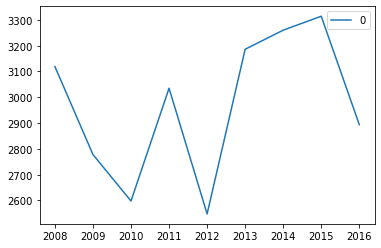

In [206]:
# ваш код
list_t = []
for i in range(2008, 2017):
    s = pd.Series(df[df['Day'].dt.year == i]['t'].sum())
    list_t.append(int(s))
list_year = np.arange(2008,2017)
#print(list_t)
pd.DataFrame(list_t, list_year).plot()

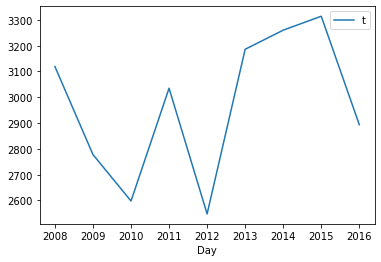

In [247]:
#2 вариант без цикла
s = df.groupby(df['Day'].dt.year).sum().plot()

